In [ ]:
# Connect to Google Drive where the dataset is stored
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn import preprocessing
from xgboost import XGBClassifier

# To ignore message warnings in code
import warnings
warnings.filterwarnings("ignore")

In [ ]:

BASE_DIR = '/content/drive/MyDrive/lung cancer symptoms/survey lung cancer.csv'
df = pd.read_csv(BASE_DIR)

In [ ]:
# Step 3: Explore Dataset
print(df.head(10))           # Display first 10 rows
print(df.info())             # Get dataset info
print(df.isnull().any())     # Check for missing values
print(df.duplicated().sum()) # Count duplicate rows

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   
5      F   75        1               2        1              1   
6      M   52        2               1        1              1   
7      F   51        2               2        2              2   
8      F   68        2               1        2              1   
9      M   53        2               2        2              2   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2  

In [ ]:
df.head(10)
# 1 == Yes
# 0 == No

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.isnull().any()

,0
GENDER,False
AGE,False
SMOKING,False
YELLOW_FINGERS,False
ANXIETY,False
PEER_PRESSURE,False
CHRONIC DISEASE,False
FATIGUE,False
ALLERGY,False
WHEEZING,False


In [ ]:
df.duplicated().sum()

33

In [ ]:
#Data Cleaning - Remove Duplicates
df.drop_duplicates(inplace=True)
print(f"Number of duplicates: ",df.duplicated().sum()) # Verify removal of duplicates

Number of duplicates:  0


In [ ]:
#Data Preprocessing - Label Encoding
# Define columns to encode
columns_to_encode = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                     'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                     'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                     'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

le = preprocessing.LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

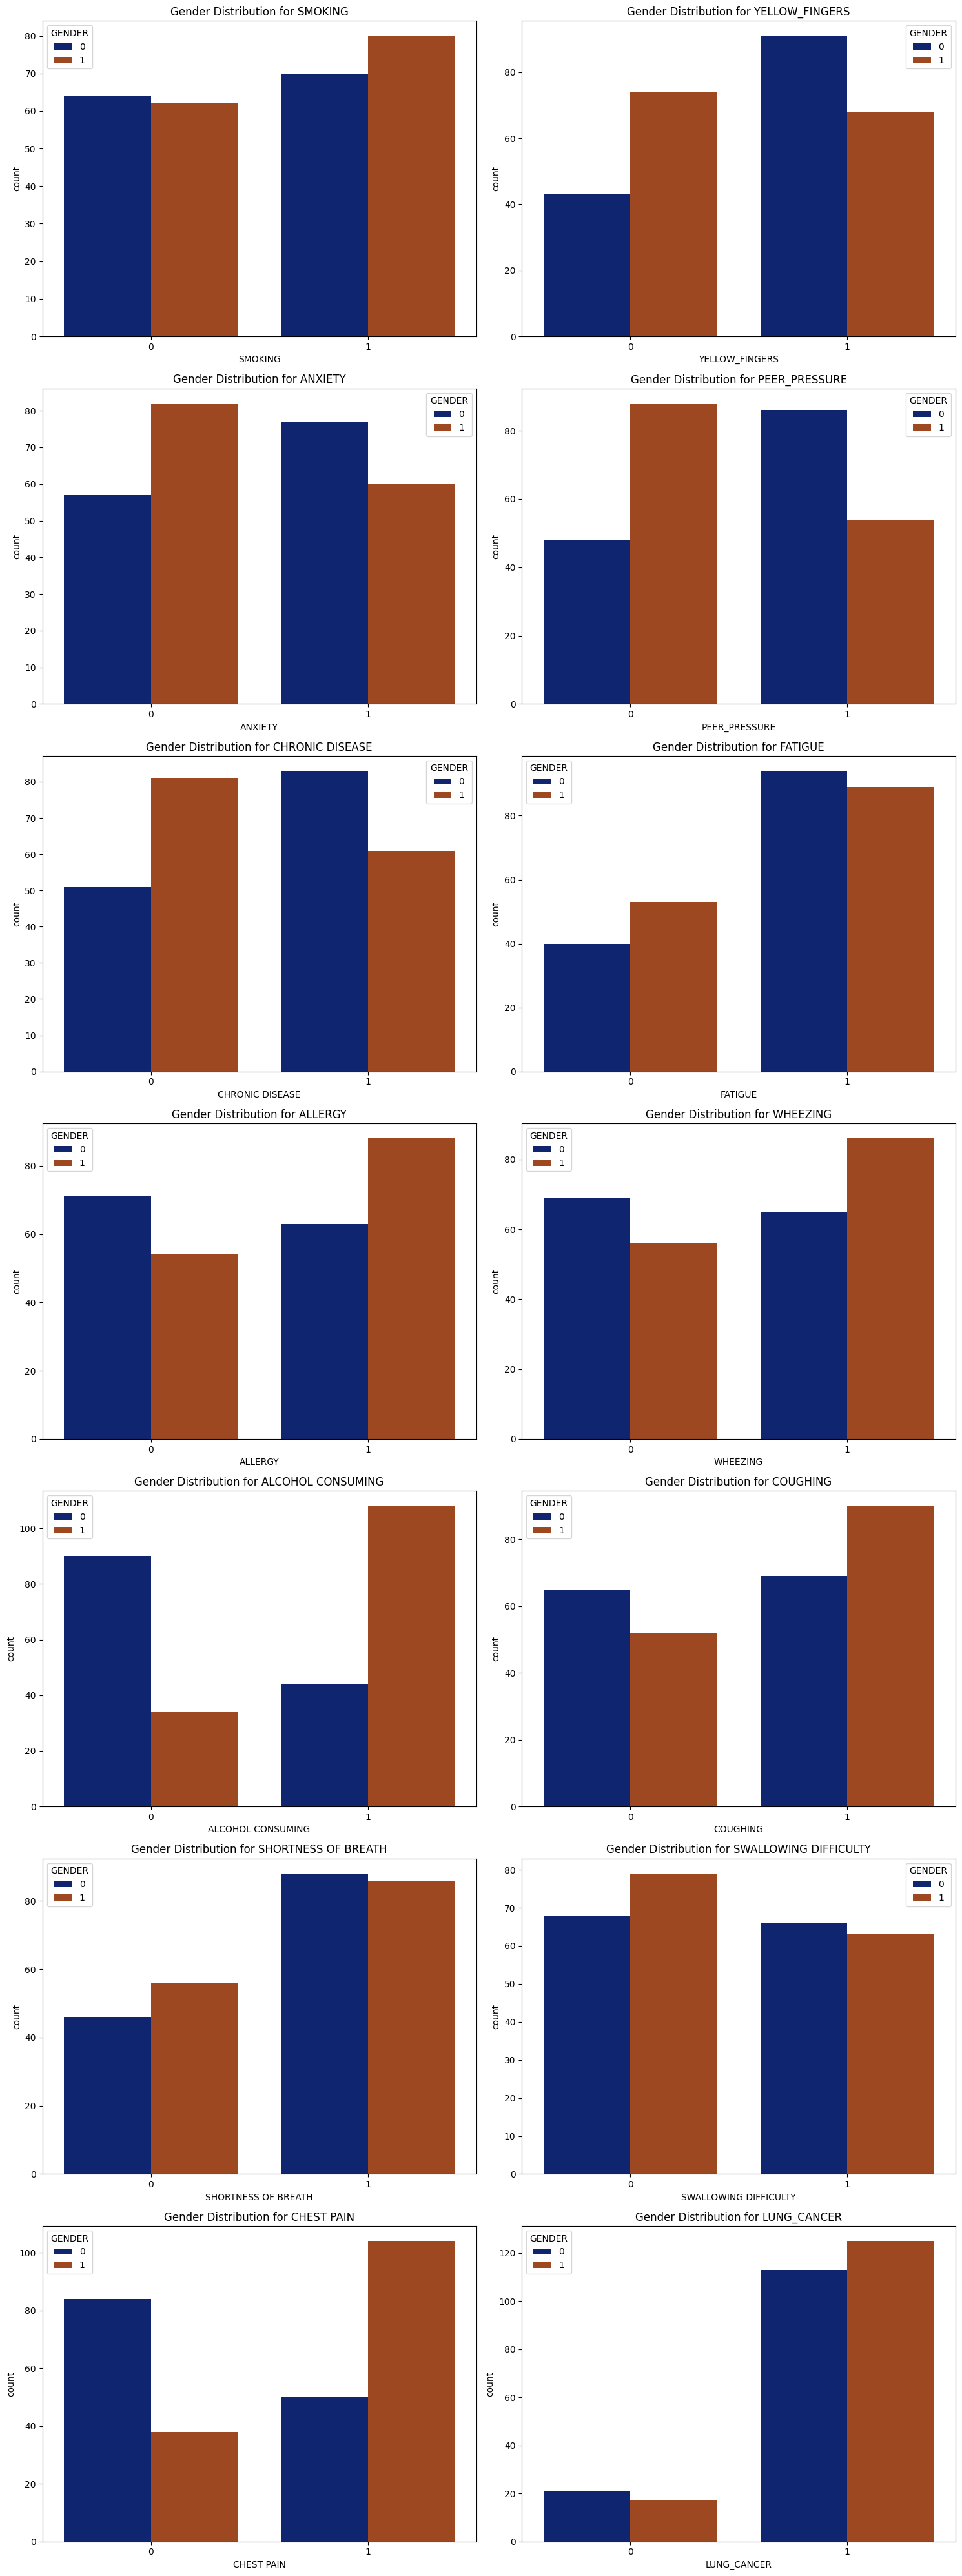

In [ ]:
# Feature Selection: Reviewing distribution of different features to lung cancer
features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
            'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
            'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
            'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 40))
for i, feature in enumerate(features):
    plt.subplot(7, 2, i + 1)
    sns.countplot(x=feature, hue='GENDER', data=df, palette="dark")
    plt.title(f'Gender Distribution for {feature}')
plt.tight_layout()
plt.show()

<Axes: >

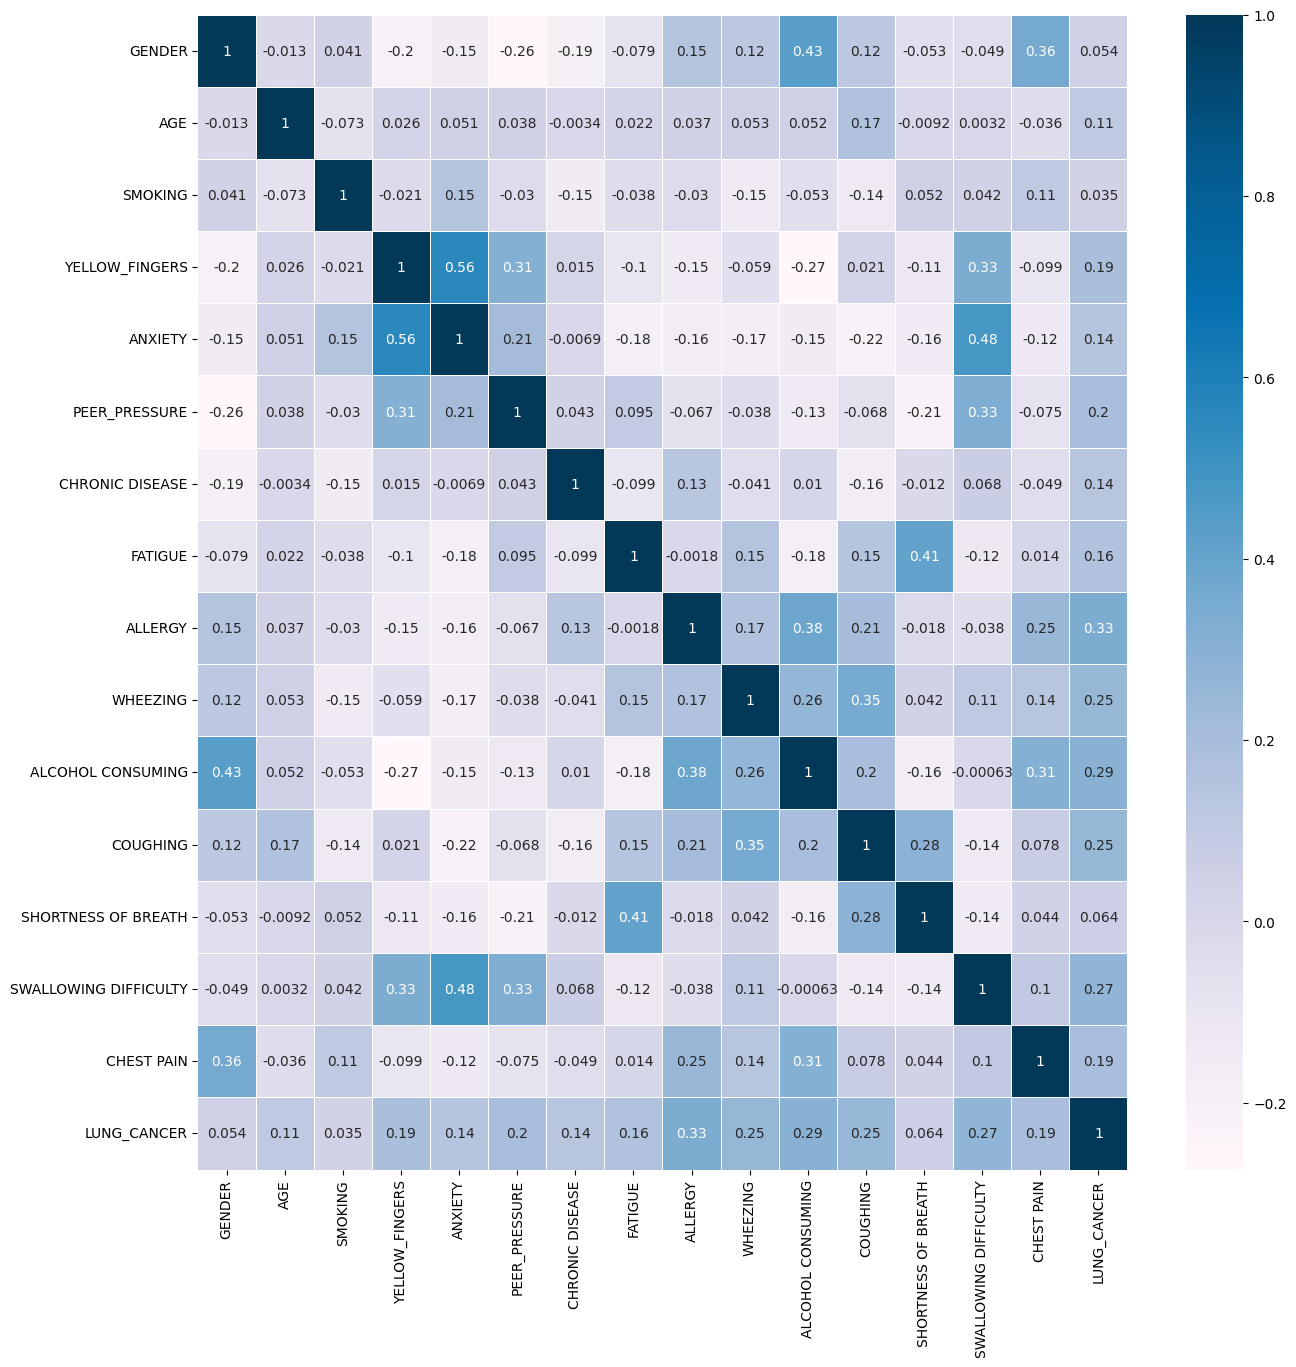

In [ ]:
# Feature Selection: Reviewing correlations of different fetures to lung cancer
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,cmap=plt.cm.PuBu)

In [ ]:
# Feature Selection: Removing irrelevant features
df_drop = df.drop(columns=['SHORTNESS OF BREATH', 'SMOKING', 'GENDER', 'AGE'])
X = df_drop.drop('LUNG_CANCER', axis=1)
y = df_drop['LUNG_CANCER']

In [ ]:
#Train-Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {pd.Series(y_resampled).value_counts()}")


#Define Models for Ensemble Learning
random_forest_model = RandomForestClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)
xgb_model = XGBClassifier(random_state=42)

#Train the Ensemble Model
ensemble_model = VotingClassifier(
    estimators=[('rf', random_forest_model),
                ('svc', svc_model),
                ('xgb', xgb_model)
                ],
    voting='soft'  # Averaging predicted probabilities
)
ensemble_model.fit(X_resampled, y_resampled)


Original dataset shape: LUNG_CANCER
1    168
0     25
Name: count, dtype: int64
Resampled dataset shape: LUNG_CANCER
1    168
0    168
Name: count, dtype: int64


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.97      0.97      0.97        70

    accuracy                           0.95        83
   macro avg       0.91      0.91      0.91        83
weighted avg       0.95      0.95      0.95        83



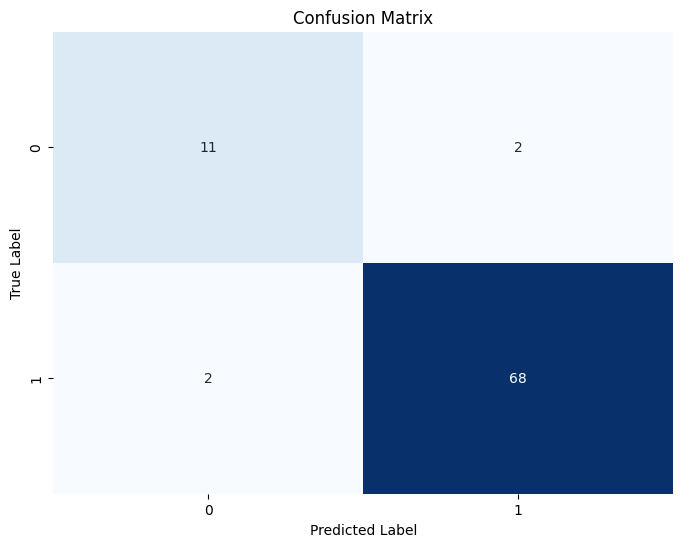

Ensemble Model Accuracy: 95.18%


In [ ]:
#Model Evaluation
y_ensemble_pred = ensemble_model.predict(X_test)
print(classification_report(y_test, y_ensemble_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_ensemble_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_ensemble_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

In [ ]:
#Save the Trained Model Using Pickle
with open('lung_cancer_symptom_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)
    print("Model saved successfully using pickle.")

#Load and Verify the Model
with open('lung_cancer_symptom_model.pkl', 'rb') as file:
    model = pickle.load(file)
    print("Model loaded successfully.")

Model saved successfully using pickle.
Model loaded successfully.
